In [1]:
#install packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#load data
violations= pd.read_csv('/Users/aren_kab/Documents/Job Search/BIC Data Analyst /explorationdatasets/BIC_Issued_Violations.csv',parse_dates=['DATE OF VIOLATION','DATE VIOLATION ISSUED'])

In [2]:
#get_info
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   VIOLATION NUMBER            7738 non-null   object             
 1   BIC NUMBER                  2760 non-null   float64            
 2   ACCOUNT NAME                7738 non-null   object             
 3   TYPE OF VIOLATION           7738 non-null   object             
 4   VIOLATION PHASE             7738 non-null   object             
 5   VIOLATION DISPOSITION       7733 non-null   object             
 6   ACCOUNT TYPE                7738 non-null   object             
 7   VIOLATION ACCOUNT ADDRESS   7563 non-null   object             
 8   VIOLATION ACCOUNT CITY      7561 non-null   object             
 9   VIOLATION ACCOUNT STATE     7562 non-null   object             
 10  VIOLATION ACCOUNT POSTCODE  7557 non-null   object          

In [3]:
#summerize table
violations.describe() 

,BIC NUMBER,MAXIMUM FINE,FINE AMOUNT,NUMBER OF COUNTS,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,2760.000000,7735.000000,6100.000000,7736.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4.315000e+03,4.315000e+03
mean,134699.934058,12206.981254,2026.597195,1.292011,40.718389,-73.922174,6.350546,28.236124,6190.888763,3.416770e+06,3.317153e+09
std,216528.035717,28022.643597,11765.248129,2.764101,0.079083,0.108157,4.543427,13.306784,20630.230140,1.178277e+06,1.138309e+09
min,8.000000,0.000000,0.000000,0.000000,40.502876,-74.252665,1.000000,1.000000,1.000000,1.001081e+06,1.000640e+09
25%,1253.500000,5000.000000,250.000000,1.000000,40.663074,-73.983922,2.000000,18.000000,119.000000,2.119707e+06,2.055855e+09
50%,3504.000000,10000.000000,500.000000,1.000000,40.717441,-73.907716,6.000000,27.000000,375.000000,3.415704e+06,3.087330e+09
75%,476276.000000,10000.000000,1500.000000,1.000000,40.775132,-73.846127,10.000000,38.000000,889.000000,4.233376e+06,4.080990e+09
max,500065.000000,830000.000000,300000.000000,107.000000,40.905021,-73.703372,18.000000,51.000000,157903.000000,5.169668e+06,5.080430e+09


### Get Started With This Data:
#### 1. How many violations were issued by BIC to unlicensed trade waste companies in a certain period of time?
#### 2. What percent of BIC issued violations had an early settlement in a certain period of time?
#### 3. What are the top 5 rule codes of issued violations in a certain period of time?

In [4]:
#Getting Started Questions to familiarize with data- Keep rows neccessary
#Also include fine columns for later
violations_analysis = violations.iloc[:, [0, 1,3,4,5,6,12,13,14,15,16,17,19,21,22]]
violations_analysis.head()

,VIOLATION NUMBER,BIC NUMBER,TYPE OF VIOLATION,VIOLATION PHASE,VIOLATION DISPOSITION,ACCOUNT TYPE,DATE OF VIOLATION,DATE VIOLATION ISSUED,MAXIMUM FINE,FINE AMOUNT,DATE FINE PAID,EARLY SETTLEMENT VIOLATION,RULE CODE,DESCRIPTION OF RULE,EXPORT DATE
0,TWC-219653,NaN,OATH,Issued,Settled,Unlicensed,2020-07-07,2020-10-01 16:54:00+00:00,5000.0,500.0,10/11/2020,True,NYC AC 16-505(a),Removed collected or disposed of trade waste o...,05/19/2022
1,TWC-218679,NaN,OATH,Issued,Settled,Unlicensed,2020-02-20,2020-02-20 15:49:00+00:00,40000.0,1000.0,02/21/2020,False,17 RCNY 2-05(b),Failed to timely notify Commission of a materi...,05/19/2022
2,TWC-211037,NaN,OATH,Issued,Settled,Unlicensed,2014-09-16,2014-12-05 17:25:00+00:00,5000.0,2500.0,04/15/2015,False,NYC AC 16-505(a),Removed collected or disposed of trade waste o...,05/19/2022
3,TWC-221854,NaN,OATH,Issued,Rescheduled,Unlicensed,2021-06-07,2022-02-17 21:05:00+00:00,5000.0,NaN,NaN,False,NYC AC 16-505(a),Removed collected or disposed of trade waste o...,05/19/2022
4,TWC-218495,NaN,OATH,Issued,Settled,Unlicensed,2020-01-27,2020-02-04 19:33:00+00:00,10000.0,0.0,NaN,False,17 RCNY 5-12(c)(1),Failed to separate recyclable materials from n...,05/19/2022


In [5]:
violations_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   VIOLATION NUMBER            7738 non-null   object             
 1   BIC NUMBER                  2760 non-null   float64            
 2   TYPE OF VIOLATION           7738 non-null   object             
 3   VIOLATION PHASE             7738 non-null   object             
 4   VIOLATION DISPOSITION       7733 non-null   object             
 5   ACCOUNT TYPE                7738 non-null   object             
 6   DATE OF VIOLATION           7738 non-null   datetime64[ns]     
 7   DATE VIOLATION ISSUED       7738 non-null   datetime64[ns, UTC]
 8   MAXIMUM FINE                7735 non-null   float64            
 9   FINE AMOUNT                 6100 non-null   float64            
 10  DATE FINE PAID              4797 non-null   object          

In [6]:
#Check the date range - Let's do 5 years of recent data
print(violations_analysis['DATE OF VIOLATION'].max())
print(violations_analysis['DATE OF VIOLATION'].min())

2022-05-09 00:00:00
2000-02-01 00:00:00


In [7]:
#lets use 2015 -2020 data to get 5 years of data
violations15_20 = violations_analysis.loc[(violations_analysis['DATE OF VIOLATION'] >= '2015-01-01')
                     & (violations_analysis['DATE OF VIOLATION'] < '2021-01-01')]

In [8]:
#Question 1: How many violations were issued by BIC to 
#unlicensed trade waste companies in a certain period of time?

In [9]:
#create a variable for unlicensesd trade waste violations 
unlicensed_trade_waste_15_20 = len(violations15_20[violations15_20['ACCOUNT TYPE']=='Unlicensed'])

In [10]:
print('Q1:',unlicensed_trade_waste_15_20, "violations were issued by BIC to unliscensed trade waste companies between 2015-2020")

Q1: 2371 violations were issued by BIC to unliscensed trade waste companies between 2015-2020


In [11]:
violations15_20['EARLY SETTLEMENT VIOLATION'].value_counts()

False    4249
True      346
Name: EARLY SETTLEMENT VIOLATION, dtype: int64

In [12]:
#### What percent of BIC issued violations had an early settlement in a certain period of time?
#Create a variable for the percent by dividing early settlement = true / total violations
Percent_BIC_Early_Settlements= (len(violations15_20[violations15_20['EARLY SETTLEMENT VIOLATION']== True])/violations15_20['EARLY SETTLEMENT VIOLATION'].count()*100)

In [13]:
print('Q2:',Percent_BIC_Early_Settlements.round(2), '% of violations were issued by BIC to unlicensed trade waste companies from 2015-2020')

Q2: 7.53 % of violations were issued by BIC to unlicensed trade waste companies from 2015-2020


In [14]:
# What are the top 5 rule codes of issued violations in a certain period of time?
#Use value counts to tabulate what are the top 5 most issued in the last 5 years
print('Top 5 rule codes of issued violations from 2015-2020 are:')
violations15_20['RULE CODE'].value_counts().sort_values(ascending=False).head(5)

Top 5 rule codes of issued violations from 2015-2020 are:


NYC AC 16-505(a)        1279
17 RCNY 1-09             347
17 RCNY 2-05(b)(iii)     326
17 RCNY 7-05             222
17 RCNY 5-08(n)          220
Name: RULE CODE, dtype: int64

### GS Questions
#### 1. 2371 violations were issued by BIC to unliscensed trade waste companies between 2015-2020
#### 2. 7.53 % of violations were issued by BIC to unlicensed trade waste companies from 2015-2020
#### 3. Top 5 rule codes of issued violations from 2015-2020 are: NYC AC 16-505(a) , 17 RCNY 1-09, 17 RCNY 2-05(b)(iii), 17 RCNY 7-05, 17 RCNY 5-08(n)

### Unique analysis 
#### Let's get an inside view of how  fines play a role for violations, 

##### 1. How has the average fine price changed in the last 5 years
##### 2. Which account types are tied to a higher payment in fines
##### 3. How quickly do fines get paid - do it by violation type or account type

In [15]:
violations15_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 7736
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   VIOLATION NUMBER            4595 non-null   object             
 1   BIC NUMBER                  2223 non-null   float64            
 2   TYPE OF VIOLATION           4595 non-null   object             
 3   VIOLATION PHASE             4595 non-null   object             
 4   VIOLATION DISPOSITION       4595 non-null   object             
 5   ACCOUNT TYPE                4595 non-null   object             
 6   DATE OF VIOLATION           4595 non-null   datetime64[ns]     
 7   DATE VIOLATION ISSUED       4595 non-null   datetime64[ns, UTC]
 8   MAXIMUM FINE                4593 non-null   float64            
 9   FINE AMOUNT                 4349 non-null   float64            
 10  DATE FINE PAID              3447 non-null   object          

In [16]:
violations15_20['YEAR OF VIOLATION ISSUED']=violations15_20['DATE VIOLATION ISSUED'].dt.year

/var/folders/vp/2flcfxx12ns473tz77qt51v80000gn/T/ipykernel_21570/4074200480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violations15_20['YEAR OF VIOLATION ISSUED']=violations15_20['DATE VIOLATION ISSUED'].dt.year


Text(0, 0.5, 'Violation Fine Amount ($)')

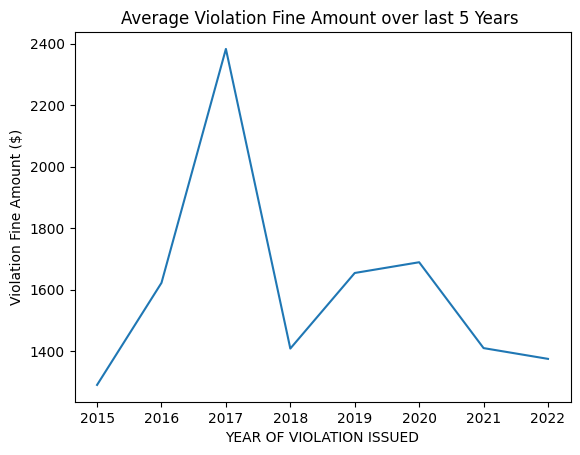

In [17]:
##### 1. How has the average fine price changed in the last 5 years
violations15_20.groupby('YEAR OF VIOLATION ISSUED')['FINE AMOUNT'].mean().plot()
plt.title('Average Violation Fine Amount over last 5 Years ')
plt.ylabel('Violation Fine Amount ($)')

## Fines have been recently declining, with a spike in 2017 

In [18]:
# 2. Which account types have paid the most fines in each of the last 5 yeras

In [19]:
#Get the fine totals by year
violations_total_fine = violations15_20.groupby(['YEAR OF VIOLATION ISSUED','ACCOUNT TYPE'])['FINE AMOUNT'].aggregate(['sum'].copy())
#Reset Index
violations_total_fine.reset_index(level=1, inplace=True)
#Pivot to plot date
violations_total_fine_pivot = pd.pivot_table(violations_total_fine,values="sum",index="YEAR OF VIOLATION ISSUED",columns="ACCOUNT TYPE")
#fill NA values with 0 for plotting 
violations_total_fine_pivot

ACCOUNT TYPE,CL1,CL2 - Broker,CL2 - Exempt,License,Registered,Unlicensed
YEAR OF VIOLATION ISSUED,,,,,,
2015,6400.0,58650.0,157050.0,482702.92,NaN,314500.00
2016,19350.0,3050.0,165150.0,595900.00,NaN,619825.00
2017,4200.0,27750.0,110750.0,266500.00,NaN,918200.00
2018,8400.0,27150.0,156900.0,261400.00,NaN,370150.00
2019,16350.0,303250.0,178050.0,165900.00,1000.0,250299.97
2020,NaN,NaN,10750.0,4000.00,500.0,1084480.00
2021,NaN,NaN,NaN,0.00,NaN,485050.00
2022,NaN,NaN,NaN,NaN,NaN,5500.00


In [20]:
violations_total_fine_pivot.sum().sort_values(ascending=False)

ACCOUNT TYPE
Unlicensed      4048004.97
License         1776402.92
CL2 - Exempt     778650.00
CL2 - Broker     419850.00
CL1               54700.00
Registered         1500.00
dtype: float64

<AxesSubplot: title={'center': 'Violations by account type over the last 5 years'}, xlabel='Account Type', ylabel='# of violations'>

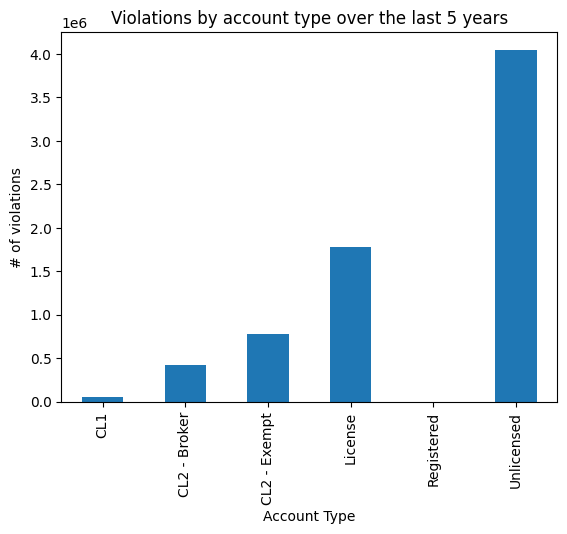

In [21]:
violations_total_fine_pivot.sum().plot.bar(title = 'Violations by account type over the last 5 years',xlabel='Account Type',ylabel='# of violations')

#### In recent years all violations seem to be attributed to unlicensed accounts, previously it was more evenly distributed. 
### Unlicensed accounts , liscensed account and CL-2 Exempt are the top 3 account types for fine totals overall

In [22]:
##### 3. How quickly do fines get paid - do it by violation type or account type

In [23]:
violations15_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 7736
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   VIOLATION NUMBER            4595 non-null   object             
 1   BIC NUMBER                  2223 non-null   float64            
 2   TYPE OF VIOLATION           4595 non-null   object             
 3   VIOLATION PHASE             4595 non-null   object             
 4   VIOLATION DISPOSITION       4595 non-null   object             
 5   ACCOUNT TYPE                4595 non-null   object             
 6   DATE OF VIOLATION           4595 non-null   datetime64[ns]     
 7   DATE VIOLATION ISSUED       4595 non-null   datetime64[ns, UTC]
 8   MAXIMUM FINE                4593 non-null   float64            
 9   FINE AMOUNT                 4349 non-null   float64            
 10  DATE FINE PAID              3447 non-null   object          

In [24]:
#Let's make the data only what we need 
violations_dates = violations15_20.iloc[:, [0,2,5,6,7,10,15]]
#standardize date format
violations_dates[["DATE VIOLATION ISSUED","DATE OF VIOLATION","DATE FINE PAID"]] = violations_dates[["DATE VIOLATION ISSUED","DATE OF VIOLATION","DATE FINE PAID"]].apply(pd.to_datetime,utc=True, errors='coerce')   # Convert multiple columns
#violations_dates['DATE VIOLATION ISSUED'] = pd.to_datetime(violations_dates.DATE VIOLATION ISSUED).dt.tz_localize(None)
violations_dates

/var/folders/vp/2flcfxx12ns473tz77qt51v80000gn/T/ipykernel_21570/2442502258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violations_dates[["DATE VIOLATION ISSUED","DATE OF VIOLATION","DATE FINE PAID"]] = violations_dates[["DATE VIOLATION ISSUED","DATE OF VIOLATION","DATE FINE PAID"]].apply(pd.to_datetime,utc=True, errors='coerce')   # Convert multiple columns


,VIOLATION NUMBER,TYPE OF VIOLATION,ACCOUNT TYPE,DATE OF VIOLATION,DATE VIOLATION ISSUED,DATE FINE PAID,YEAR OF VIOLATION ISSUED
0,TWC-219653,OATH,Unlicensed,2020-07-07 00:00:00+00:00,2020-10-01 16:54:00+00:00,2020-10-11 00:00:00+00:00,2020
1,TWC-218679,OATH,Unlicensed,2020-02-20 00:00:00+00:00,2020-02-20 15:49:00+00:00,2020-02-21 00:00:00+00:00,2020
4,TWC-218495,OATH,Unlicensed,2020-01-27 00:00:00+00:00,2020-02-04 19:33:00+00:00,NaT,2020
5,TWC-212092,OATH,Unlicensed,2015-07-07 00:00:00+00:00,2015-07-14 12:19:00+00:00,2015-07-16 00:00:00+00:00,2015
6,TWC-213258,OATH,CL2 - Exempt,2016-03-16 00:00:00+00:00,2016-03-16 18:49:00+00:00,2016-03-17 00:00:00+00:00,2016
...,...,...,...,...,...,...,...
7729,TWC-212951,OATH,Unlicensed,2016-01-21 00:00:00+00:00,2016-01-27 19:49:00+00:00,2016-02-03 00:00:00+00:00,2016
7730,TWC-216698,OATH,CL2 - Exempt,2018-04-02 00:00:00+00:00,2019-01-30 16:00:00+00:00,2019-02-26 00:00:00+00:00,2019
7732,TWC-215321,OATH,License,2017-12-20 00:00:00+00:00,2018-01-23 14:07:00+00:00,2018-03-01 00:00:00+00:00,2018
7734,TWC-216552,OATH,License,2018-12-07 00:00:00+00:00,2018-12-12 18:08:00+00:00,NaT,2018


In [25]:
violations_dates[['DATE VIOLATION ISSUED','DATE FINE PAID']]

,DATE VIOLATION ISSUED,DATE FINE PAID
0,2020-10-01 16:54:00+00:00,2020-10-11 00:00:00+00:00
1,2020-02-20 15:49:00+00:00,2020-02-21 00:00:00+00:00
4,2020-02-04 19:33:00+00:00,NaT
5,2015-07-14 12:19:00+00:00,2015-07-16 00:00:00+00:00
6,2016-03-16 18:49:00+00:00,2016-03-17 00:00:00+00:00
...,...,...
7729,2016-01-27 19:49:00+00:00,2016-02-03 00:00:00+00:00
7730,2019-01-30 16:00:00+00:00,2019-02-26 00:00:00+00:00
7732,2018-01-23 14:07:00+00:00,2018-03-01 00:00:00+00:00
7734,2018-12-12 18:08:00+00:00,NaT


In [26]:
violations_dates['DURATION OF DAYS TO PAY FINE'] = (np.round((violations_dates['DATE FINE PAID'] - violations_dates['DATE VIOLATION ISSUED']) / np.timedelta64(1, 'D'),decimals =0))


/var/folders/vp/2flcfxx12ns473tz77qt51v80000gn/T/ipykernel_21570/906233906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violations_dates['DURATION OF DAYS TO PAY FINE'] = (np.round((violations_dates['DATE FINE PAID'] - violations_dates['DATE VIOLATION ISSUED']) / np.timedelta64(1, 'D'),decimals =0))


In [27]:
violations_dates

,VIOLATION NUMBER,TYPE OF VIOLATION,ACCOUNT TYPE,DATE OF VIOLATION,DATE VIOLATION ISSUED,DATE FINE PAID,YEAR OF VIOLATION ISSUED,DURATION OF DAYS TO PAY FINE
0,TWC-219653,OATH,Unlicensed,2020-07-07 00:00:00+00:00,2020-10-01 16:54:00+00:00,2020-10-11 00:00:00+00:00,2020,9.0
1,TWC-218679,OATH,Unlicensed,2020-02-20 00:00:00+00:00,2020-02-20 15:49:00+00:00,2020-02-21 00:00:00+00:00,2020,0.0
4,TWC-218495,OATH,Unlicensed,2020-01-27 00:00:00+00:00,2020-02-04 19:33:00+00:00,NaT,2020,NaN
5,TWC-212092,OATH,Unlicensed,2015-07-07 00:00:00+00:00,2015-07-14 12:19:00+00:00,2015-07-16 00:00:00+00:00,2015,1.0
6,TWC-213258,OATH,CL2 - Exempt,2016-03-16 00:00:00+00:00,2016-03-16 18:49:00+00:00,2016-03-17 00:00:00+00:00,2016,0.0
...,...,...,...,...,...,...,...,...
7729,TWC-212951,OATH,Unlicensed,2016-01-21 00:00:00+00:00,2016-01-27 19:49:00+00:00,2016-02-03 00:00:00+00:00,2016,6.0
7730,TWC-216698,OATH,CL2 - Exempt,2018-04-02 00:00:00+00:00,2019-01-30 16:00:00+00:00,2019-02-26 00:00:00+00:00,2019,26.0
7732,TWC-215321,OATH,License,2017-12-20 00:00:00+00:00,2018-01-23 14:07:00+00:00,2018-03-01 00:00:00+00:00,2018,36.0
7734,TWC-216552,OATH,License,2018-12-07 00:00:00+00:00,2018-12-12 18:08:00+00:00,NaT,2018,NaN


In [28]:
#get overall average of duration to pay fine for baseline average
np.round(violations_dates['DURATION OF DAYS TO PAY FINE'].mean(),decimals=2)

70.17

<AxesSubplot: title={'center': 'Average Days for Fine Payment by Year from 2015-2020'}, xlabel='Year', ylabel='# of Days'>

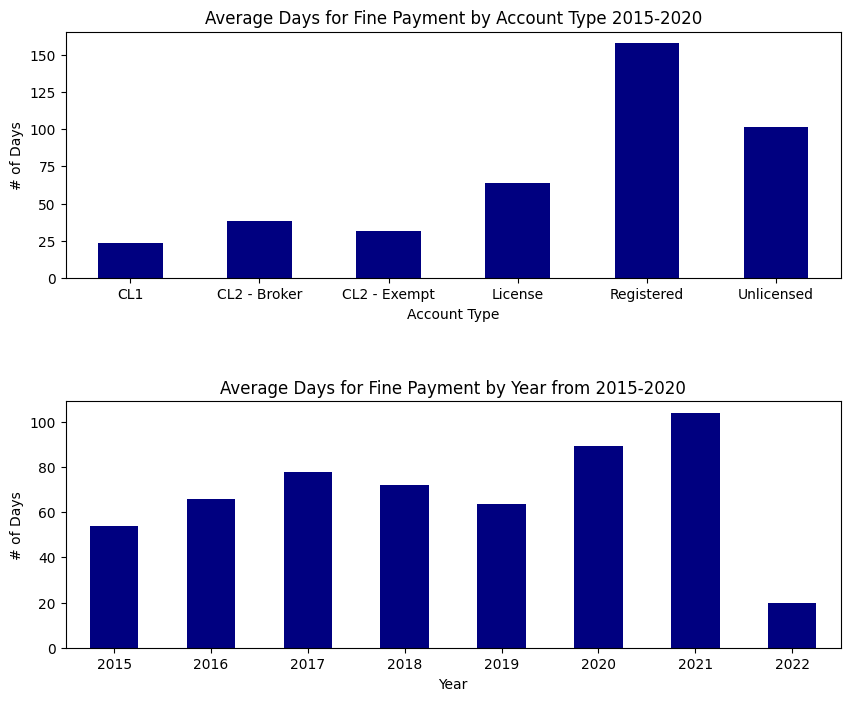

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1)    
plt.subplots_adjust(wspace=.2, hspace=.5)
violations_dates.groupby('ACCOUNT TYPE')['DURATION OF DAYS TO PAY FINE'].mean().plot.bar(ax=axes[0],figsize=(10,8),rot=0,color='navy',title ='Average Days for Fine Payment by Account Type 2015-2020',xlabel='Account Type',ylabel='# of Days')
violations_dates.groupby('YEAR OF VIOLATION ISSUED')['DURATION OF DAYS TO PAY FINE'].mean().plot.bar(ax=axes[1],figsize=(10,8),rot=0,color='navy',title ='Average Days for Fine Payment by Year from 2015-2020',xlabel='Year',ylabel='# of Days')


#### Registered users take the most amount of days by 50% more than the other highest amount.
#### For years, so far 2022 has had a low average of day payments- Could this be due to any new policy or technology advancement?

### Learnings from this Pre-Covid and Post-Covid analysis are the following 
#### 1. Average fine amount has went through spikes, but has held stable in the 5 year period between 2015-2022. 
####  2. Account type classifications or variations are more homogenous in recent years, but Unlicensed accounts always had the most violations in the entire time period per year despite more variation
#### 3. Duration for fine payment is down significantly YOY, as 2021 was a 5-year high. This could be tied to a potential policy change or technology advancement to make payments easier to process but this theory needs concrete backing

#### Next Steps: Further exploring the dataset to include violation disposition data to see if the performance for violations or fines is tied to certain determinations or early settlements   